
# Swiss Roll And Swiss-Hole Reduction
This notebook seeks to compare two popular non-linear dimensionality
techniques, T-distributed Stochastic Neighbor Embedding (t-SNE) and
Locally Linear Embedding (LLE), on the classic Swiss Roll dataset.
Then, we will explore how they both deal with the addition of a hole
in the data.


## Swiss Roll

We start by generating the Swiss Roll dataset.



In [1]:
import matplotlib.pyplot as plt

from sklearn import datasets, manifold

sr_points, sr_color = datasets.make_swiss_roll(n_samples=1500, random_state=0)

Now, let's take a look at our data:



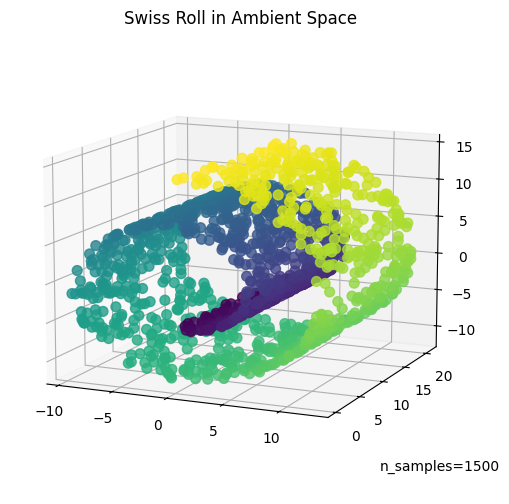

In [2]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")
fig.add_axes(ax)
ax.scatter(
    sr_points[:, 0], sr_points[:, 1], sr_points[:, 2], c=sr_color, s=50, alpha=0.8
)
ax.set_title("Swiss Roll in Ambient Space")
ax.view_init(azim=-66, elev=12)
_ = ax.text2D(0.8, 0.05, s="n_samples=1500", transform=ax.transAxes)

Computing the LLE and t-SNE embeddings, we find that LLE seems to unroll the
Swiss Roll pretty effectively. t-SNE on the other hand, is able
to preserve the general structure of the data, but, poorly represents the
continuous nature of our original data. Instead, it seems to unnecessarily
clump sections of points together.



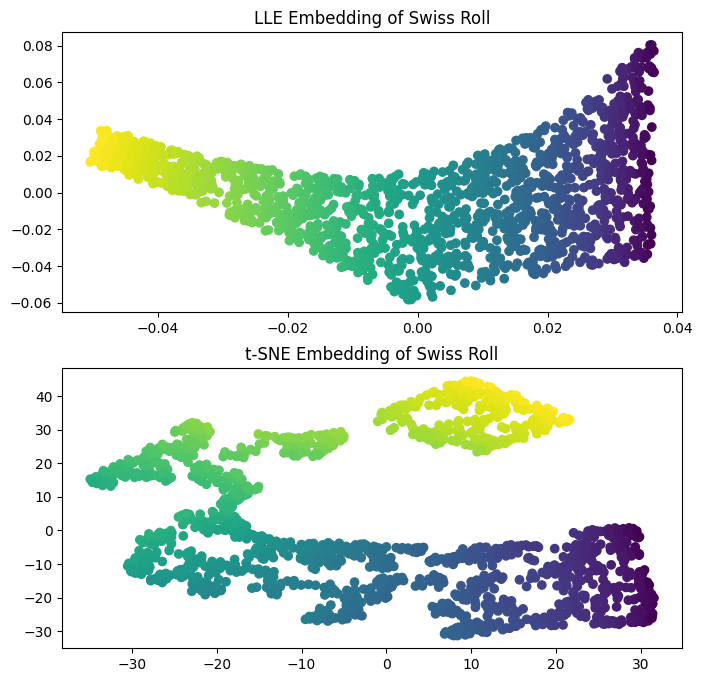

In [3]:
sr_lle, sr_err = manifold.locally_linear_embedding(
    sr_points, n_neighbors=12, n_components=2
)

sr_tsne = manifold.TSNE(n_components=2, perplexity=40, random_state=0).fit_transform(
    sr_points
)

fig, axs = plt.subplots(figsize=(8, 8), nrows=2)
axs[0].scatter(sr_lle[:, 0], sr_lle[:, 1], c=sr_color)
axs[0].set_title("LLE Embedding of Swiss Roll")
axs[1].scatter(sr_tsne[:, 0], sr_tsne[:, 1], c=sr_color)
_ = axs[1].set_title("t-SNE Embedding of Swiss Roll")

<div class="alert alert-info"><h4>Note</h4><p>LLE seems to be stretching the points from the center (purple)
    of the swiss roll. However, we observe that this is simply a byproduct
    of how the data was generated. There is a higher density of points near the
    center of the roll, which ultimately affects how LLE reconstructs the
    data in a lower dimension.</p></div>



## Swiss-Hole

Now let's take a look at how both algorithms deal with us adding a hole to
the data. First, we generate the Swiss-Hole dataset and plot it:



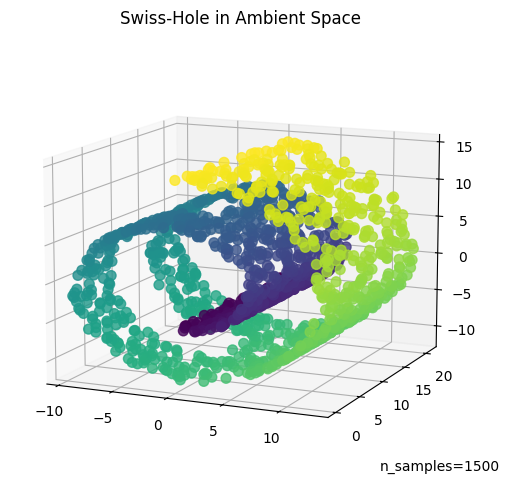

In [4]:
sh_points, sh_color = datasets.make_swiss_roll(
    n_samples=1500, hole=True, random_state=0
)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")
fig.add_axes(ax)
ax.scatter(
    sh_points[:, 0], sh_points[:, 1], sh_points[:, 2], c=sh_color, s=50, alpha=0.8
)
ax.set_title("Swiss-Hole in Ambient Space")
ax.view_init(azim=-66, elev=12)
_ = ax.text2D(0.8, 0.05, s="n_samples=1500", transform=ax.transAxes)

Computing the LLE and t-SNE embeddings, we obtain similar results to the
Swiss Roll. LLE very capably unrolls the data and even preserves
the hole. t-SNE, again seems to clump sections of points together, but, we
note that it preserves the general topology of the original data.



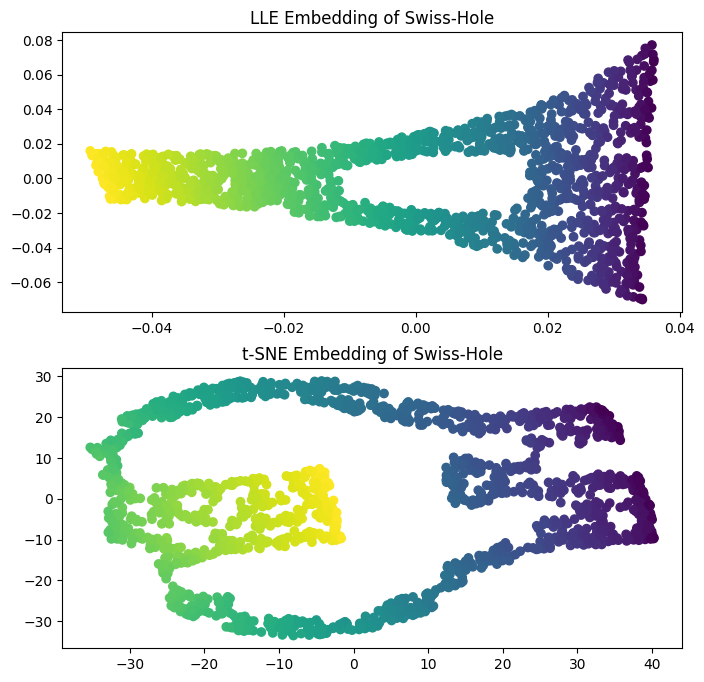

In [5]:
sh_lle, sh_err = manifold.locally_linear_embedding(
    sh_points, n_neighbors=12, n_components=2
)

sh_tsne = manifold.TSNE(
    n_components=2, perplexity=40, init="random", random_state=0
).fit_transform(sh_points)

fig, axs = plt.subplots(figsize=(8, 8), nrows=2)
axs[0].scatter(sh_lle[:, 0], sh_lle[:, 1], c=sh_color)
axs[0].set_title("LLE Embedding of Swiss-Hole")
axs[1].scatter(sh_tsne[:, 0], sh_tsne[:, 1], c=sh_color)
_ = axs[1].set_title("t-SNE Embedding of Swiss-Hole")

## Concluding remarks

We note that t-SNE benefits from testing more combinations of parameters.
Better results could probably have been obtained by better tuning these
parameters.

We observe that, as seen in the "Manifold learning on
handwritten digits" example, t-SNE generally performs better than LLE
on real world data.

